# A Jupyter notebook to run pyVOLCANS

In [377]:
import pyvolcans.pyvolcans_func as pvf

In [378]:
# Prepare arguments
volcano_input = 221190  # Can be name [str] or Smithsonian ID (vnum) [int]
weights = {'tectonic_setting': 0.2,
           'geochemistry': 0.2,
           'morphology': 0.2,
           'eruption_size': 0.2,
           'eruption_style': 0.2
          }
count = 10

# Validate input arguments
if isinstance(volcano_input, int):
    volcano_idx = pvf.get_volcano_idx_from_number(volcano_input)
    volcano_name = pvf.get_volcano_name_from_idx(volcano_idx)
    volcano_vnum = volcano_input
else:
    volcano_name = volcano_input
    volcano_vnum = pvf.get_volcano_number_from_name(volcano_input)

assert sum(weights.values()) == 1  # Weights must add up to 1

# Calculate analogy scores
volcans_result = pvf.calculate_weighted_analogy_matrix(volcano_input, weights)
top_analogues, volcano_name = pvf.get_analogies(volcano_input, volcans_result, count)
pvf.warn_on_perfect_analogues(result=top_analogues)

In [379]:
# Display the top 10 best matches
top_analogues

,name,country,smithsonian_id,total_analogy,ATs,AG,AM,ASz,ASt
117,Emuruangogolak,Kenya,222051,0.934646,0.2,0.158824,0.178947,0.200000,0.196875
17,Pantelleria,Italy,211071,0.931199,0.2,0.186275,0.184211,0.200000,0.160714
136,Kyejo,Tanzania,222170,0.928560,0.2,0.158824,0.194737,0.200000,0.175000
88,Kone,Ethiopia,221200,0.925774,0.2,0.182353,0.168421,0.200000,0.175000
979,Black Butte Crater Lava Field,United States,324010,0.923673,0.2,0.147059,0.176614,0.200000,0.200000
982,Hell's Half Acre,United States,324040,0.915480,0.2,0.147059,0.168421,0.200000,0.200000
114,"Barrier, The",Kenya,222030,0.911452,0.2,0.144706,0.189474,0.200000,0.177273
128,Longonot,Kenya,222100,0.903199,0.2,0.147059,0.189474,0.200000,0.166667
980,Craters of the Moon,United States,324020,0.899587,0.2,0.162745,0.136842,0.200000,0.200000
142,Nyamuragira,DR Congo,223020,0.887751,0.2,0.147059,0.173684,0.196452,0.170556


In [380]:
# Print full data about source volcano
pvf.get_volcano_source_data(volcano_input)

{'name': 'Fentale',
 'country': 'Ethiopia',
 'smithsonian_id': 221190,
 'tectonic_setting': {0.5: 'Rift Continental Crust'},
 'geochemistry': {'Foidite': 0.0,
  'Phonolite': 0.0,
  'Trachyte': 0.25,
  'Trachyandesite/Basaltic trachyandesite': 0.0,
  'Phono-tephrite/Tephri-phonolite': 0.0,
  'Tephrite/Basanite/Trachybasalt': 0.25,
  'Basalt': 0.0,
  'Andesite': 0.25,
  'Dacite': 0.0,
  'Rhyolite': 0.25},
 'morphology': 0.6842105263157895,
 'eruption_size': {'VEI leq 2': 1.0,
  'VEI 3': 0.0,
  'VEI 4': 0.0,
  'VEI 5': 0.0,
  'VEI 6': 0.0,
  'VEI 7': 0.0,
  'VEI 8': 0.0},
 'eruption_style': {'Lava flow and/or fountaining': 1.0,
  'Ballistics and tephra': 0.0,
  'Phreatic and phreatomagmatic activity': 0.0,
  'Water-sediment flows': 0.0,
  'Tsunamis': 0.0,
  'Pyroclastic density currents': 0.0,
  'Edifice collapse/destruction': 0.0,
  'Caldera formation': 0.0}}

In [381]:
# Check the analogy for a specific volcano by name
volcans_result.loc[volcans_result['name'] == 'Santorini']

,name,country,smithsonian_id,total_analogy,ATs,AG,AM,ASz,ASt
21,Santorini,Greece,212040,0.775685,0.1,0.184967,0.168421,0.17438,0.147917


In [382]:
# Check the analogy for a specific volcano by ID
volcans_result.loc[volcans_result['smithsonian_id'] == 371050]

,name,country,smithsonian_id,total_analogy,ATs,AG,AM,ASz,ASt
1351,Hengill,Iceland,371050,0.823474,0.1,0.162745,0.168421,0.2,0.192308


,name,ATs,AG,AM,ASz,ASt
21,Santorini,0.100,0.184967,0.168421,0.174380,0.147917
1361,Torfajokull,0.100,0.169281,0.129689,0.188811,0.187500
1437,James Ross Island,0.175,0.174510,0.176614,0.000000,0.000000
983,Yellowstone,0.200,0.147059,0.152632,0.000000,0.125000


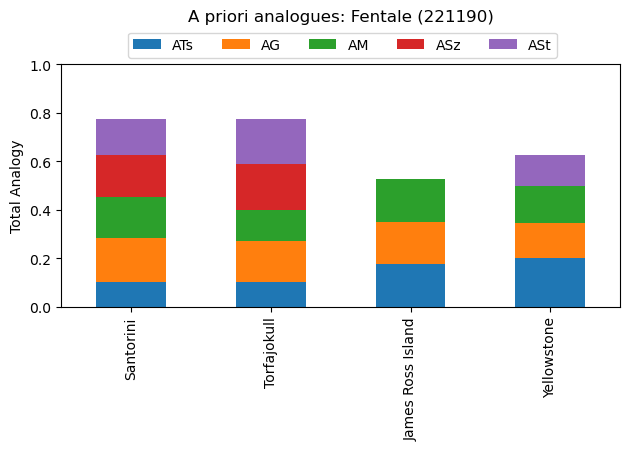

In [383]:
# Plot comparisons with specific volcanoes selected apriori
apriori_volcanoes = ['Santorini', 'Torfajokull', 'James Ross Island', 'Yellowstone']

# weights label is used in the filename if save_figure is True
weights_label = 'Ts{:.3f}G{:.3f}M{:.3f}Sz{:.3f}St{:.3f}'.format(*weights.values())

pvf.plot_bar_apriori_analogues(volcano_name, volcano_vnum, apriori_volcanoes,
                               volcans_result, weights_label, save_figure=False)

In [384]:
# Display proportion of better analogues than apriori volcanoes
percentiles, better_analogues = pvf.get_many_analogy_percentiles(volcano_input,
                                                                 apriori_volcanoes,
                                                                 volcans_result)



According to PyVOLCANS, the following percentage of volcanoes in the GVP database
are better analogues to Fentale than the 'a priori' analogues reported below:

Santorini (212040): 12%

Torfajokull (372050): 12%

James Ross Island (390829): 56%

Yellowstone (325010): 46%

